In [13]:
!pip install qiskit qiskit-ibmq-provider matplotlib pylatexenc qiskit-aer

  Obtaining dependency information for qiskit-aer from https://files.pythonhosted.org/packages/1c/4c/1011b475bd2b6b3c0817e1edb049cbe6d6d8c2b973e726bba1f48d348f8c/qiskit_aer-0.13.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 5.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [14]:
# All imports here.
import qiskit
from qiskit import IBMQ

In [15]:
# Initialise and load the IBM account to access the quantum hardware.
IBMQ.save_account('9228c681cbbec9c39509629102cb2c9f17d63be1e51554a71a09797df15cfb5c45b40805adcb834e9c54116b9484b72bf7dfd7bac15513a6e6a39a57f8aeacac')
IBMQ.load_account()

configrc.store_credentials:WARNING:2024-02-14 20:52:33,562: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2024-02-14 20:52:33,990: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
from qiskit import *

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)


/home/szymon/Documents/quantum-computing/venv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


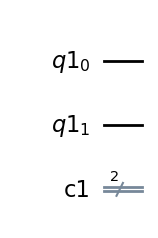

In [17]:
circuit.draw(output='mpl')

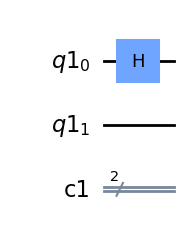

In [18]:
circuit.h(qr[0])
circuit.draw(output='mpl')

In [19]:
circuit.cx(qr[0], qr[1])

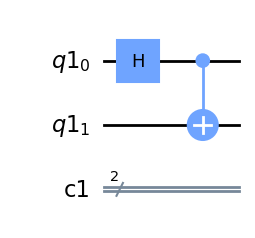

In [20]:
circuit.draw(output='mpl')

In [21]:
circuit.measure(qr, cr)

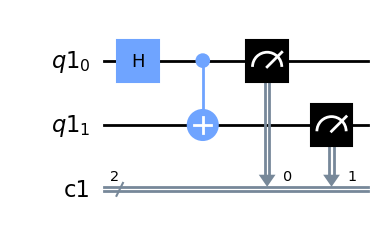

In [22]:
circuit.draw(output='mpl')

In [23]:
simulator = Aer.get_backend('qasm_simulator')

/tmp/ipykernel_979141/683745692.py:1: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator = Aer.get_backend('qasm_simulator')


In [26]:
result = execute(circuit, simulator).result()

/tmp/ipykernel_979141/1564687761.py:1: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  result = execute(circuit, simulator).result()


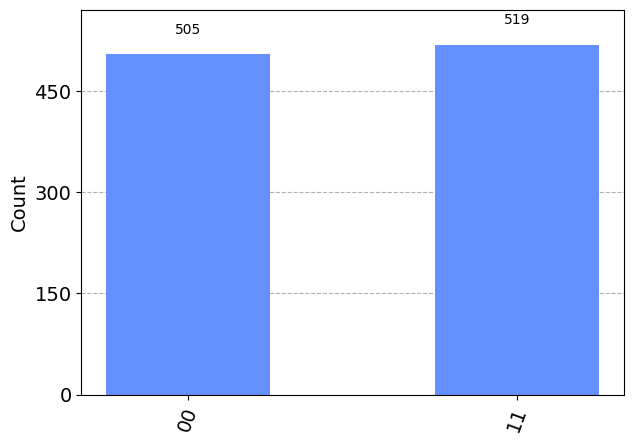

In [27]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [29]:
USE_QUANTUM_HARDWARE = True
if USE_QUANTUM_HARDWARE:
    IBMQ.load_account()
    provider = IBMQ.get_provider('ibm-q')
    qcomp = provider.get_backend('ibm_brisbane')
    job = execute(circuit, backend=qcomp)
    from qiskit.tools.monitor import job_monitor
    job_monitor(job)
    result = job.result()
    plot_histogram(result.get_counts(circuit))

ibmqfactory.load_account:WARNING:2024-02-14 21:16:35,059: Credentials are already in use. The existing account in the session will be replaced.
/tmp/ipykernel_979141/103564453.py:6: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(circuit, backend=qcomp)


Job Status: job has successfully run


In [30]:
result = job.result()

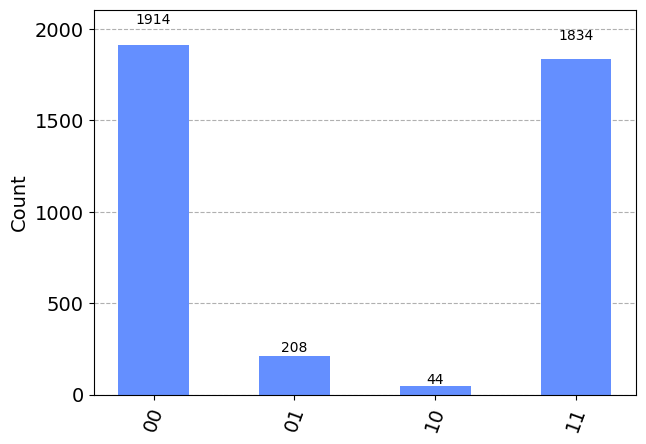

In [31]:
plot_histogram(result.get_counts(circuit))
